In [83]:
# names_df['State'] = names_df['State'].replace({'AK': 'Alaska', 'AL': 'Alabama' , 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado',
#                                    'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii',
#                                    'ID': 'Idaho','IL':'Illinois','IN':'Indiana','IA':'Iowa','KS':'Kansas','KY':'Kentucky','LA':'Louisiana','ME':'Maine',
#                                    'MT':'Montana','NE':'Nebraska','NV':'Nevada','NH':'New Hampshire','NJ':'New Jersey','NM':'New Mexico',
#                                    'NY':'New York','NC':'North Carolina','ND':'North Dakota','OH':'Ohio','OK':'Oklahoma','OR':'Oregon','MD':'Maryland',
#                                    'MA':'Massachusetts','MI':'Michigan','MN':'Minnesota','MS':'Mississippi','MO':'Missouri','PA':'Pennsylvania','RI':'Rhode Island',
#                                    'SC':'South Carolina','SD':'South Dakota','TN':'Tennessee','TX':'Texas','UT':'Utah','VT':'Vermont','VA':'Virginia','WA':'Washington',
#                                    'WV':'West Virginia','WI':'Wisconsin','WY':'Wyoming'})

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
names_df = pd.read_csv('names.csv')

In [86]:
regions_df = pd.read_csv('regions.csv')

In [87]:
states_df = pd.read_csv('states.csv')

In [88]:
names_df['Gender'] = names_df['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [89]:
names_df.head()

,State,Gender,Year,Name,Births
0,AK,Female,1980,Jessica,116
1,AK,Female,1980,Jennifer,114
2,AK,Female,1980,Sarah,82
3,AK,Female,1980,Amanda,71
4,AK,Female,1980,Melissa,65


from matplotlib import pyplot as plt
_df_4['Births'].plot(kind='hist', bins=20, title='Births')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Births']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Births')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['Births'].plot(kind='line', figsize=(8, 4), title='Births')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Births', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [92]:
# Extract the decade from the year
names_df['decade'] = (names_df['Year'] // 10) * 10


In [107]:
# Group by decade and name, then sum the counts
decade_name_group = names_df.groupby(['decade', 'Name']).sum().reset_index()

# Find the most popular name for each decade
most_popular_names = decade_name_group.loc[decade_name_group.groupby('decade')['Year'].idxmax()]


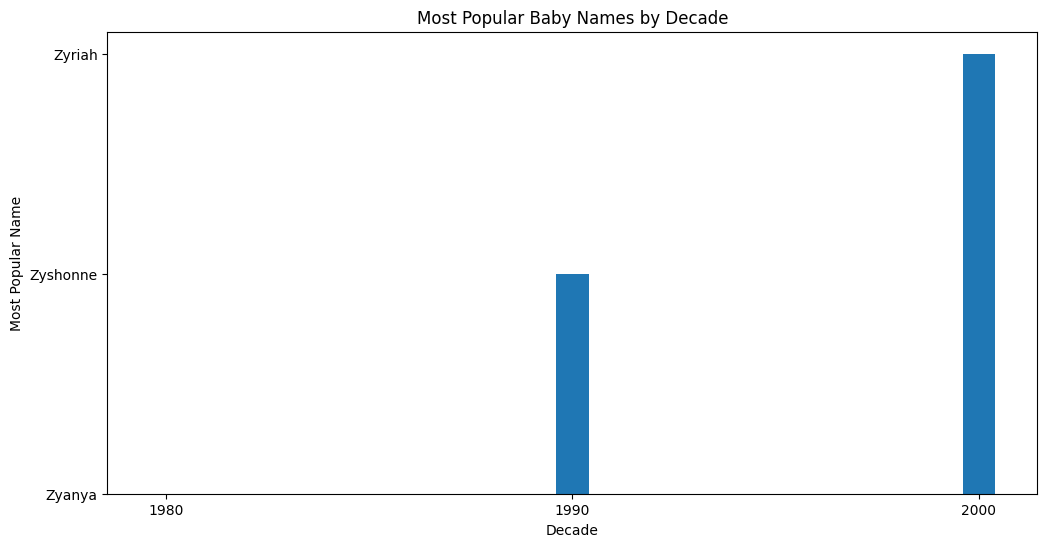

In [97]:
# Plot the most popular names by decade
plt.figure(figsize=(12, 6))
plt.bar(most_popular_names['decade'], most_popular_names['Name'])
plt.xlabel('Decade')
plt.ylabel('Most Popular Name')
plt.title('Most Popular Baby Names by Decade')
plt.xticks(most_popular_names['decade'])
plt.show()

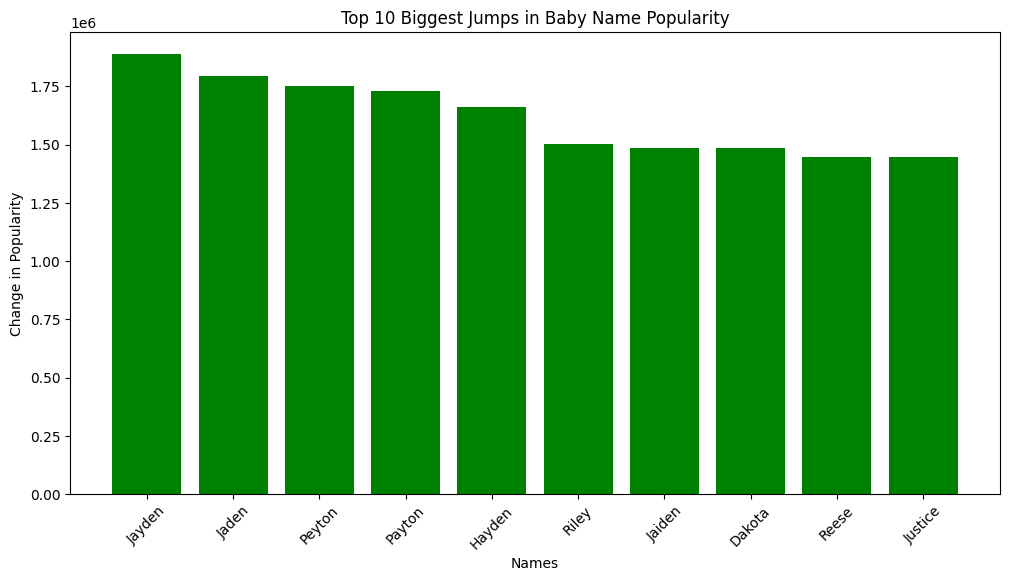

In [111]:
# Extract the decade from the year
names_df['decade'] = (names_df['Year'] // 10) * 10

# Group by decade and name, then sum the counts
decade_name_group = names_df.groupby(['decade', 'Name']).sum().reset_index()

# Create a pivot table to see counts of names per decade
pivot_table = decade_name_group.pivot(index='Name', columns='decade', values='Year').fillna(0)

# Calculate the change in counts between each decade
pivot_table['change'] = pivot_table.diff(axis=1).fillna(0).sum(axis=1)

# Identify the biggest jumps and drops
biggest_jumps = pivot_table['change'].nlargest(10)
biggest_drops = pivot_table['change'].nsmallest(10)

# Plot the biggest jumps in popularity
plt.figure(figsize=(12, 6))
plt.bar(biggest_jumps.index, biggest_jumps.values, color='green')
plt.xlabel('Names')
plt.ylabel('Change in Popularity')
plt.title('Top 10 Biggest Jumps in Baby Name Popularity')
plt.xticks(rotation=45)
plt.show()


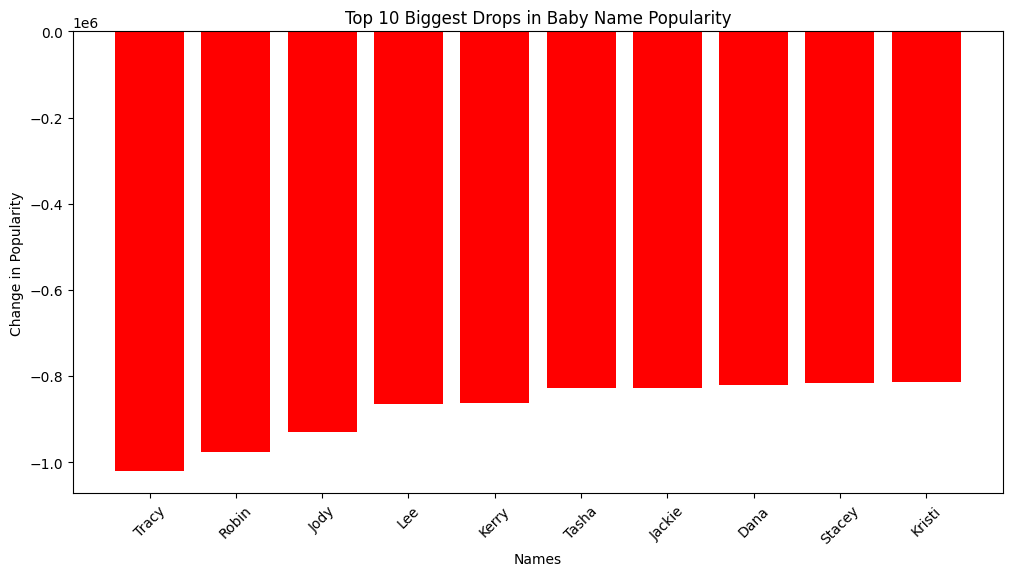

In [112]:
# Plot the biggest drops in popularity
plt.figure(figsize=(12, 6))
plt.bar(biggest_drops.index, biggest_drops.values, color='red')
plt.xlabel('Names')
plt.ylabel('Change in Popularity')
plt.title('Top 10 Biggest Drops in Baby Name Popularity')
plt.xticks(rotation=45)
plt.show()

In [119]:
# Group by name and gender, and count the occurrences
gender_group = names_df.groupby(['Name', 'Gender']).sum().reset_index()

# Pivot table to see counts of names per gender
pivot_table = gender_group.pivot(index='Name', columns='Gender', values='Year').fillna(0)

# Classify names based on gender
pivot_table['classification'] = 'Unisex'
pivot_table.loc[pivot_table['Male'] == 0, 'classification'] = 'Girl-only'
pivot_table.loc[pivot_table['Female'] == 0, 'classification'] = 'Boy-only'

# Merge the classification back to the original dataset
names_df = names_df.merge(pivot_table[['classification']], on='Name', how='left')


In [122]:
# Extract the decade from the year
names_df['decade'] = (names_df['Year'] // 10) * 10

In [123]:
# Group by decade and classification to get the counts
decade_classification = names_df.groupby(['decade', 'classification']).sum().reset_index()


In [125]:
# Normalize the counts for better comparison
decade_classification['normalized_count'] = decade_classification.groupby('decade')['Year'].transform(lambda x: x / x.sum())

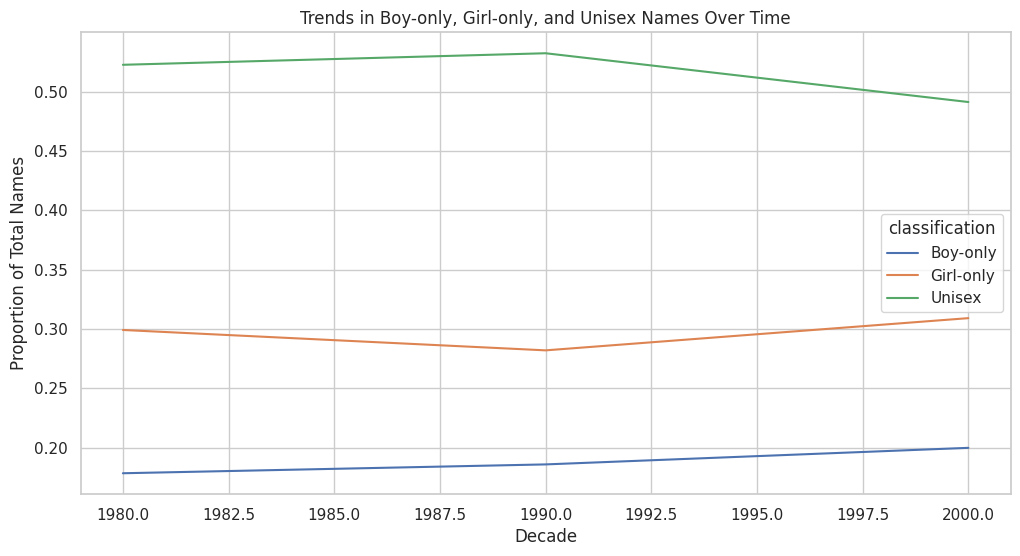

In [126]:
# Set the plot style
sns.set(style="whitegrid")

# Plot the trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=decade_classification, x='decade', y='normalized_count', hue='classification')
plt.xlabel('Decade')
plt.ylabel('Proportion of Total Names')
plt.title('Trends in Boy-only, Girl-only, and Unisex Names Over Time')
plt.show()

In [128]:
merged_df = pd.merge(names_df, regions_df, on='State', how='left')

In [131]:
# Group by region and name, then sum the counts
region_name_group = merged_df.groupby(['Region', 'Name']).sum().reset_index()

# Find the most popular names in each region
most_popular_names_by_region = region_name_group.loc[region_name_group.groupby('Region')['Year'].idxmax()]


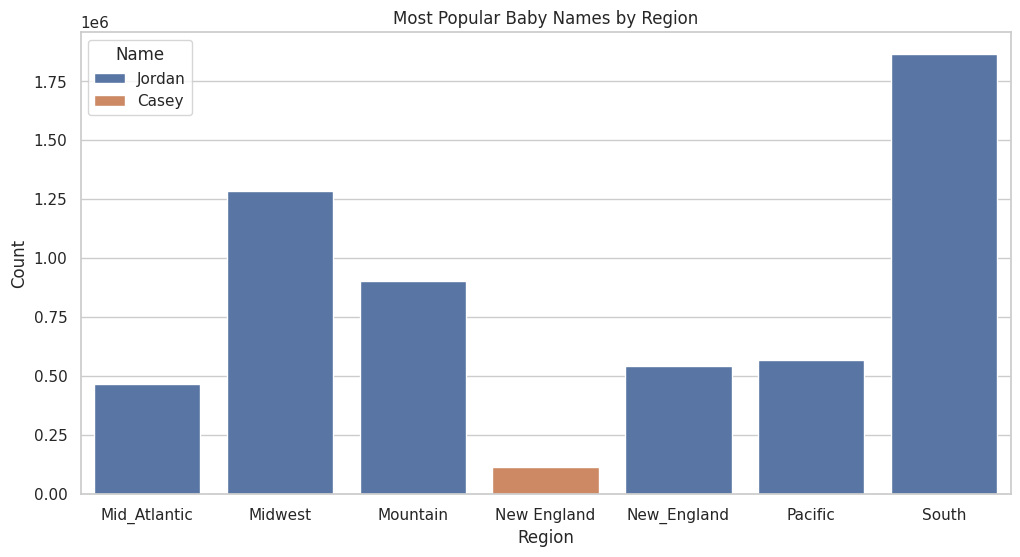

In [133]:
# Set the plot style
sns.set(style="whitegrid")

# Plot the most popular names by region
plt.figure(figsize=(12, 6))
sns.barplot(data=most_popular_names_by_region, x='Region', y='Year', hue='Name')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Most Popular Baby Names by Region')
plt.legend(title='Name')
plt.show()

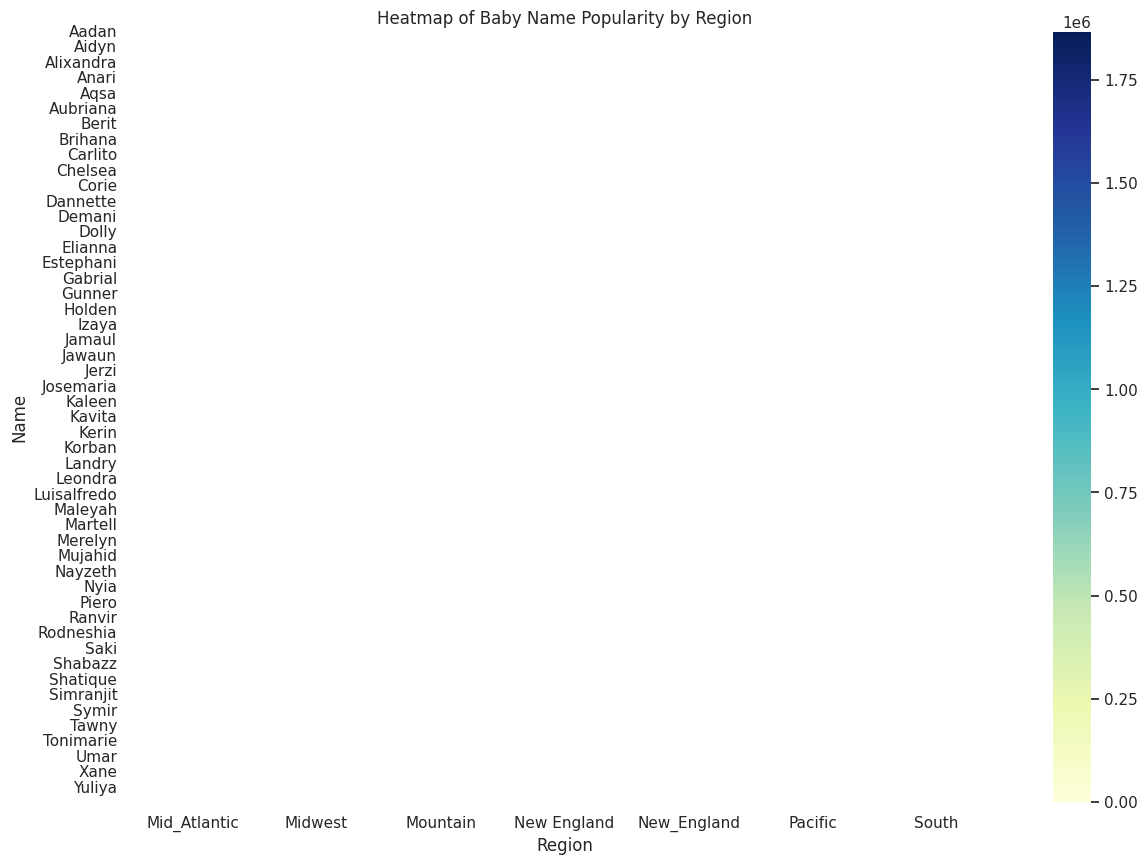

In [135]:
# Create a pivot table for the heatmap
pivot_table = region_name_group.pivot(index='Name', columns='Region', values='Year').fillna(0)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Baby Name Popularity by Region')
plt.xlabel('Region')
plt.ylabel('Name')
plt.show()